In [1]:
import pandas as pd
import env
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import acquire
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [3]:
df_iris=data('iris')

In [4]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [5]:
df_iris.shape

(150, 5)

In [6]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [6]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# exercise5

In [9]:
df_google='https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
df_google_csv = df_google.replace('/edit#gid=', '/export?format=csv&gid=')
df_google_csv = pd.read_csv(df_google_csv)

In [10]:
df_google_csv.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
df_google_csv.shape

(891, 12)

In [12]:
df_google_csv.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df_google_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df_ = df_google_csv.select_dtypes(exclude=['int', 'float'])


In [15]:
df_unique = df_google_csv.select_dtypes(exclude=['int', 'float']).nunique().to_frame().reset_index()
df_unique.columns = ['Variable','DistinctCount']
df_unique

,Variable,DistinctCount
0,Name,891
1,Sex,2
2,Ticket,681
3,Cabin,147
4,Embarked,3


In [16]:
# problem6

In [17]:
df_excel= pd.read_excel(io='~/Downloads/Excel_Exercises.xlsx')

In [18]:
df_excel.sample=df_excel.head(100)
df_excel.sample

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.60,593.30,No
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.90,267.40,Yes
5,0013-MHZWF,Female,0.0,No,Yes,1.0,1.0,0.0,Credit card (automatic),69.40,571.45,No
6,0013-SMEOE,Female,1.0,Yes,No,1.0,2.0,2.0,Bank transfer (automatic),109.70,7904.25,No
7,0014-BMAQU,Male,0.0,Yes,No,2.0,2.0,2.0,Credit card (automatic),84.65,5377.80,No
8,0015-UOCOJ,Female,1.0,No,No,1.0,1.0,0.0,Electronic check,48.20,340.35,No
9,0016-QLJIS,Female,0.0,Yes,Yes,2.0,1.0,2.0,Mailed check,90.45,5957.90,No


In [19]:
df_excel.shape

(7049, 12)

In [20]:
df_excel.columns[0:4]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner'], dtype='object')

In [21]:
df_excel.select_dtypes(include=['object'])

,customer_id,gender,partner,dependents,payment_type,churn
0,0002-ORFBO,Female,Yes,Yes,Mailed check,No
1,0003-MKNFE,Male,No,No,Mailed check,No
2,0004-TLHLJ,Male,No,No,Electronic check,Yes
3,0011-IGKFF,Male,Yes,No,Electronic check,Yes
4,0013-EXCHZ,Female,Yes,No,Mailed check,Yes
...,...,...,...,...,...,...
7044,9987-LUTYD,Female,No,No,Mailed check,No
7045,9992-RRAMN,Male,Yes,No,Electronic check,Yes
7046,9992-UJOEL,Male,No,No,Mailed check,No
7047,9993-LHIEB,Male,Yes,Yes,Mailed check,No


In [22]:
df_excel.select_dtypes(include=['float64']).max()-df_excel.select_dtypes(include=['float64']).min()

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

In [3]:
# prep exercise
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import warnings
import prepare
import acquire

In [12]:
prepare.prep_iris(df_iris1)
prepare.clean_iris(df_iris1)

(     sepal_length  sepal_width  petal_length  petal_width     species  \
 67            5.8          2.7           4.1          1.0  versicolor   
 83            6.0          2.7           5.1          1.6  versicolor   
 3             4.6          3.1           1.5          0.2      setosa   
 91            6.1          3.0           4.6          1.4  versicolor   
 111           6.4          2.7           5.3          1.9   virginica   
 60            5.0          2.0           3.5          1.0  versicolor   
 55            5.7          2.8           4.5          1.3  versicolor   
 121           5.6          2.8           4.9          2.0   virginica   
 114           5.8          2.8           5.1          2.4   virginica   
 126           6.2          2.8           4.8          1.8   virginica   
 30            4.8          3.1           1.6          0.2      setosa   
 73            6.1          2.8           4.7          1.2  versicolor   
 70            5.9          3.2       

In [25]:
df_iris.drop(columns=['species_id','measurement_id','Unnamed: 0'],inplace=True)

In [26]:
df_iris.rename(columns={'species_name':'species'},inplace=True)

In [29]:
dummy_df_iris = pd.get_dummies(df_iris.species, dummy_na=False, drop_first=[True])
df_iris=pd.concat([df_iris,dummy_df_iris],axis=1)

In [30]:
def prep_iris(df):
    train, test = train_test_split(df_iris, test_size=.2, 
                               random_state=123, stratify=df_iris['versicolor'])
    n_train, validate = train_test_split(train, test_size=.25, 
                 random_state=123, stratify=train.versicolor)
    
    return n_train, validate, test

(     sepal_length  sepal_width  petal_length  petal_width     species  \
 67            5.8          2.7           4.1          1.0  versicolor   
 83            6.0          2.7           5.1          1.6  versicolor   
 3             4.6          3.1           1.5          0.2      setosa   
 91            6.1          3.0           4.6          1.4  versicolor   
 111           6.4          2.7           5.3          1.9   virginica   
 60            5.0          2.0           3.5          1.0  versicolor   
 55            5.7          2.8           4.5          1.3  versicolor   
 121           5.6          2.8           4.9          2.0   virginica   
 114           5.8          2.8           5.1          2.4   virginica   
 126           6.2          2.8           4.8          1.8   virginica   
 30            4.8          3.1           1.6          0.2      setosa   
 73            6.1          2.8           4.7          1.2  versicolor   
 70            5.9          3.2       

In [31]:
df_titanic=acquire.get_titanic_data()

In [32]:
df_titanic.drop(columns=['Unnamed: 0','embarked','age','deck','class'],inplace=True)

In [33]:
df_titanic

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,Southampton,1
887,887,1,1,female,0,0,30.0000,Southampton,1
888,888,0,3,female,1,2,23.4500,Southampton,0
889,889,1,1,male,0,0,30.0000,Cherbourg,1


In [34]:
dummy_df_titanic = pd.get_dummies(df_titanic[['sex','embark_town']], dummy_na=False, drop_first=[True])
df_titanic=pd.concat([df_titanic ,dummy_df_titanic],axis=1)

In [35]:
def prep_titanic(df):
    train, test = train_test_split(df_titanic, test_size=.2, 
                               random_state=123, stratify=df_titanic['survived'])
    n_train, validate = train_test_split(train, test_size=.25, 
                 random_state=123, stratify=train.survived)
    
    return n_train, validate, test

In [36]:
prep_titanic(df_titanic)

(     passenger_id  survived  pclass     sex  sibsp  parch      fare  \
 455           455         1       3    male      0      0    7.8958   
 380           380         1       1  female      0      0  227.5250   
 492           492         0       1    male      0      0   30.5000   
 55             55         1       1    male      0      0   35.5000   
 243           243         0       3    male      0      0    7.1250   
 ..            ...       ...     ...     ...    ...    ...       ...   
 695           695         0       2    male      0      0   13.5000   
 128           128         1       3  female      1      1   22.3583   
 636           636         0       3    male      0      0    7.9250   
 222           222         0       3    male      0      0    8.0500   
 496           496         1       1  female      1      0   78.2667   
 
      embark_town  alone  sex_male  embark_town_Queenstown  \
 455    Cherbourg      1         1                       0   
 380    Ch

In [68]:
df_telco=acquire.get_telco_data()

In [70]:
df_telco.drop(columns=['Unnamed: 0','internet_service_type_id','phone_service.1','multiple_lines.1','internet_service_type_id.1','online_security.1','online_backup.1','device_protection.1','contract_type_id','payment_type_id','tech_support.1','streaming_tv.1','streaming_movies.1','contract_type_id.1' ,'paperless_billing.1','payment_type_id.1','monthly_charges.1','total_charges.1','internet_service_type_id.2'],inplace=True)

In [112]:
df_telco

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.60,593.3,No,DSL
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.90,542.4,No,DSL
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.90,280.85,Yes,Fiber optic
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.00,1237.85,Yes,Fiber optic
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.90,267.4,Yes,Fiber optic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9282-IZGQK,Female,0,No,No,1,Yes,Yes,No,No,No,No,No,Yes,Yes,85.00,85,Yes,Fiber optic
7039,9462-MJUAW,Male,0,No,No,4,Yes,Yes,No,No,No,No,No,No,No,50.40,206.6,Yes,DSL
7040,9705-ZJBCG,Female,0,Yes,Yes,13,Yes,No,Yes,No,No,Yes,No,No,No,54.15,701.05,No,DSL
7041,9777-IQHWP,Male,0,Yes,Yes,64,Yes,Yes,Yes,No,Yes,No,No,Yes,No,93.40,5822.3,No,Fiber optic


In [114]:
dummy_df_telco = pd.get_dummies(df_telco[['partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','internet_service_type']], dummy_na=False, drop_first=[True])
df_telco=pd.concat([df_telco ,dummy_df_telco],axis=1)

In [115]:
df_telco.drop(columns=['partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','internet_service_type'],inplace=True)

In [123]:
def prep_telco(df):
    train, test = train_test_split(df_telco, test_size=.2, 
                               random_state=123)
    n_train, validate = train_test_split(train, test_size=.25, 
                 random_state=123)
    
    return n_train, validate, test

In [128]:
prep_telco(df_telco)

(     customer_id  gender  senior_citizen  tenure  monthly_charges  \
 440   0643-OKLRP  Female               1      47            80.35   
 67    0112-QWPNC    Male               0      49            84.35   
 600   0877-SDMBN  Female               0      54           103.95   
 4883  9993-LHIEB    Male               0      67            67.85   
 1258  2455-USLMV  Female               0      31            84.75   
 ...          ...     ...             ...     ...              ...   
 1794  7964-YESJC  Female               0      24            66.30   
 817   1194-SPVSP    Male               0       1            19.65   
 901   5702-KVQRD    Male               0      71            82.55   
 1987  3030-YDNRM    Male               0       8            74.85   
 6958  1839-UMACK    Male               0      42            25.05   
 
      total_charges  partner_Yes  dependents_Yes  phone_service_Yes  \
 440        3825.85            1               0                  1   
 67         4059

In [125]:
prep_telco(df_telco)

(     customer_id  gender  senior_citizen  tenure  monthly_charges  \
 440   0643-OKLRP  Female               1      47            80.35   
 67    0112-QWPNC    Male               0      49            84.35   
 600   0877-SDMBN  Female               0      54           103.95   
 4883  9993-LHIEB    Male               0      67            67.85   
 1258  2455-USLMV  Female               0      31            84.75   
 ...          ...     ...             ...     ...              ...   
 1794  7964-YESJC  Female               0      24            66.30   
 817   1194-SPVSP    Male               0       1            19.65   
 901   5702-KVQRD    Male               0      71            82.55   
 1987  3030-YDNRM    Male               0       8            74.85   
 6958  1839-UMACK    Male               0      42            25.05   
 
      total_charges  partner_Yes  dependents_Yes  phone_service_Yes  \
 440        3825.85            1               0                  1   
 67         4059

In [1]:
# Exploration

In [106]:
# problem1-1

In [5]:
ac_df_iris=acquire.get_iris_data()

In [6]:
pr_iris=prepare.prep_iris(ac_df_iris)

In [25]:
iris_train, iris_validate, iris_test = prepare.clean_iris(pr_iris)

In [26]:
iris_train.shape,iris_validate.shape,iris_test.shape

((90, 7), (30, 7), (30, 7))

In [105]:
# exploration 1-2

In [29]:
iris_train

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
67,5.8,2.7,4.1,1.0,versicolor,1,0
83,6.0,2.7,5.1,1.6,versicolor,1,0
3,4.6,3.1,1.5,0.2,setosa,0,0
91,6.1,3.0,4.6,1.4,versicolor,1,0
111,6.4,2.7,5.3,1.9,virginica,0,1
60,5.0,2.0,3.5,1.0,versicolor,1,0
55,5.7,2.8,4.5,1.3,versicolor,1,0
121,5.6,2.8,4.9,2.0,virginica,0,1
114,5.8,2.8,5.1,2.4,virginica,0,1
126,6.2,2.8,4.8,1.8,virginica,0,1


In [37]:
iris_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 67 to 28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  90 non-null     float64
 1   sepal_width   90 non-null     float64
 2   petal_length  90 non-null     float64
 3   petal_width   90 non-null     float64
 4   species       90 non-null     object 
 5   versicolor    90 non-null     uint8  
 6   virginica     90 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 4.4+ KB


In [54]:
iris_train.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
count,90.000000,90.000000,90.000000,90.000000,90,90.000000,90.000000
unique,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,NaN,versicolor,NaN,NaN
freq,NaN,NaN,NaN,NaN,30,NaN,NaN
mean,5.826667,3.075556,3.744444,1.223333,NaN,0.333333,0.333333
std,0.817752,0.462847,1.761965,0.771115,NaN,0.474045,0.474045
min,4.300000,2.000000,1.000000,0.100000,NaN,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.400000,NaN,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,NaN,0.000000,0.000000
75%,6.400000,3.375000,5.100000,1.800000,NaN,1.000000,1.000000


array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>],
       [<AxesSubplot:title={'center':'versicolor'}>,
        <AxesSubplot:title={'center':'virginica'}>]], dtype=object)

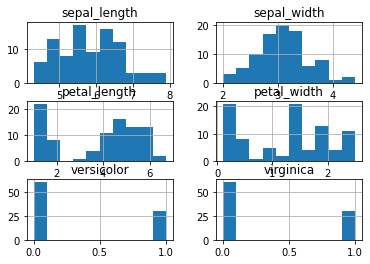

In [27]:
iris_train.hist()

sepal_length
6.7    6
6.1    6
5.0    6
5.1    6
5.4    5
5.7    5
4.9    4
5.5    4
5.8    4
6.2    4
4.8    3
5.6    3
7.2    3
6.8    3
6.4    3
6.0    3
6.3    3
6.9    3
7.7    2
5.9    2
4.6    2
4.4    2
6.5    2
5.2    2
6.6    1
4.5    1
7.9    1
4.3    1
Name: sepal_length, dtype: int64
6.7    6.666667
6.1    6.666667
5.0    6.666667
5.1    6.666667
5.4    5.555556
5.7    5.555556
4.9    4.444444
5.5    4.444444
5.8    4.444444
6.2    4.444444
4.8    3.333333
5.6    3.333333
7.2    3.333333
6.8    3.333333
6.4    3.333333
6.0    3.333333
6.3    3.333333
6.9    3.333333
7.7    2.222222
5.9    2.222222
4.6    2.222222
4.4    2.222222
6.5    2.222222
5.2    2.222222
6.6    1.111111
4.5    1.111111
7.9    1.111111
4.3    1.111111
Name: sepal_length, dtype: float64


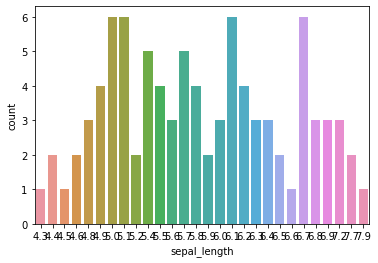

sepal_width
3.0    14
2.9     9
2.8     8
3.2     8
3.4     6
3.1     6
2.7     5
2.5     4
3.3     4
3.8     4
2.3     3
3.5     3
3.6     3
3.7     2
3.9     2
2.4     2
2.2     2
2.6     1
4.2     1
4.0     1
2.0     1
4.4     1
Name: sepal_width, dtype: int64
3.0    15.555556
2.9    10.000000
2.8     8.888889
3.2     8.888889
3.4     6.666667
3.1     6.666667
2.7     5.555556
2.5     4.444444
3.3     4.444444
3.8     4.444444
2.3     3.333333
3.5     3.333333
3.6     3.333333
3.7     2.222222
3.9     2.222222
2.4     2.222222
2.2     2.222222
2.6     1.111111
4.2     1.111111
4.0     1.111111
2.0     1.111111
4.4     1.111111
Name: sepal_width, dtype: float64


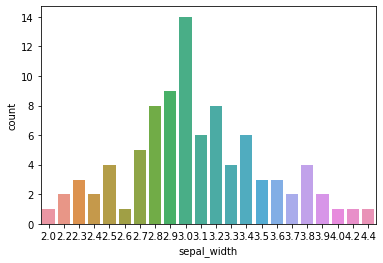

petal_length
1.5    7
1.4    7
5.1    5
4.5    5
4.0    4
1.3    4
1.6    4
4.7    3
5.7    3
5.6    3
4.8    3
1.7    3
4.9    3
4.3    2
5.0    2
5.8    2
4.1    2
6.0    2
6.1    2
1.2    2
5.4    2
5.3    2
4.6    2
5.2    1
4.2    1
3.6    1
4.4    1
3.9    1
1.1    1
3.7    1
6.4    1
6.7    1
1.0    1
5.9    1
3.3    1
5.5    1
1.9    1
3.5    1
3.0    1
Name: petal_length, dtype: int64
1.5    7.777778
1.4    7.777778
5.1    5.555556
4.5    5.555556
4.0    4.444444
1.3    4.444444
1.6    4.444444
4.7    3.333333
5.7    3.333333
5.6    3.333333
4.8    3.333333
1.7    3.333333
4.9    3.333333
4.3    2.222222
5.0    2.222222
5.8    2.222222
4.1    2.222222
6.0    2.222222
6.1    2.222222
1.2    2.222222
5.4    2.222222
5.3    2.222222
4.6    2.222222
5.2    1.111111
4.2    1.111111
3.6    1.111111
4.4    1.111111
3.9    1.111111
1.1    1.111111
3.7    1.111111
6.4    1.111111
6.7    1.111111
1.0    1.111111
5.9    1.111111
3.3    1.111111
5.5    1.111111
1.9    1.111111
3.5    1.11

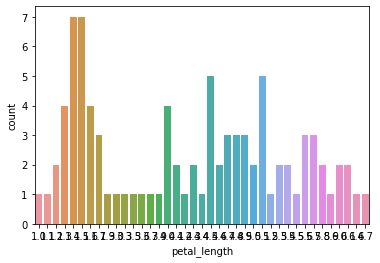

petal_width
0.2    14
1.3    11
0.4     7
2.3     6
1.8     6
1.0     5
1.4     5
2.0     5
1.5     5
0.3     4
0.1     3
2.5     3
2.1     3
1.6     2
2.4     2
1.9     2
1.7     2
1.2     1
0.5     1
2.2     1
0.6     1
1.1     1
Name: petal_width, dtype: int64
0.2    15.555556
1.3    12.222222
0.4     7.777778
2.3     6.666667
1.8     6.666667
1.0     5.555556
1.4     5.555556
2.0     5.555556
1.5     5.555556
0.3     4.444444
0.1     3.333333
2.5     3.333333
2.1     3.333333
1.6     2.222222
2.4     2.222222
1.9     2.222222
1.7     2.222222
1.2     1.111111
0.5     1.111111
2.2     1.111111
0.6     1.111111
1.1     1.111111
Name: petal_width, dtype: float64


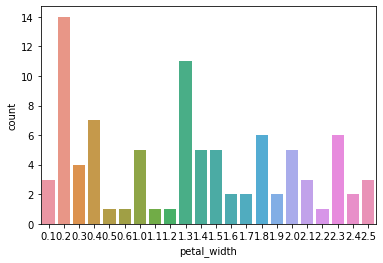

species
versicolor    30
setosa        30
virginica     30
Name: species, dtype: int64
versicolor    33.333333
setosa        33.333333
virginica     33.333333
Name: species, dtype: float64


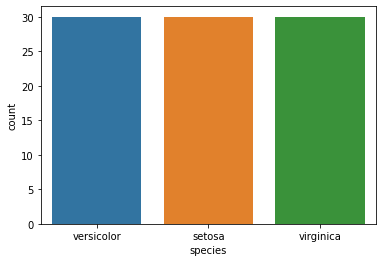

versicolor
0    60
1    30
Name: versicolor, dtype: int64
0    66.666667
1    33.333333
Name: versicolor, dtype: float64


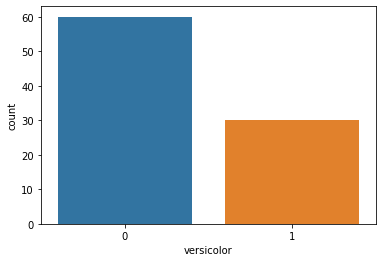

virginica
0    60
1    30
Name: virginica, dtype: int64
0    66.666667
1    33.333333
Name: virginica, dtype: float64


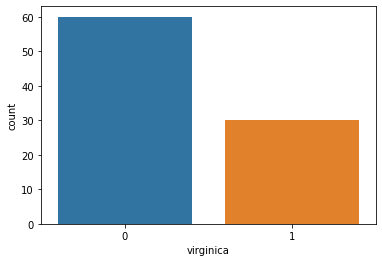

In [128]:
num_vars=['sepal_length','sepal_width','petal_length','petal_width','species','versicolor','virginica']
cat_vars=['species']
for col in num_vars:
    print(col)
    print(iris_train[col].value_counts())
    print(iris_train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=iris_train)
    plt.show()

<AxesSubplot:>

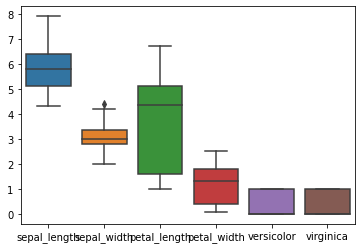

In [45]:
sns.boxplot(data=iris_train)

<AxesSubplot:xlabel='species', ylabel='Count'>

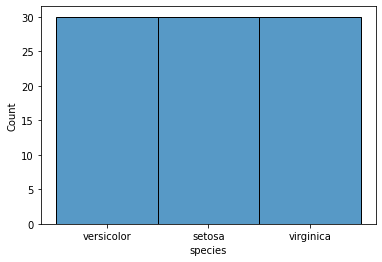

In [47]:
sns.histplot(data=iris_train, x="species")

species
versicolor    30
setosa        30
virginica     30
Name: species, dtype: int64
versicolor    33.333333
setosa        33.333333
virginica     33.333333
Name: species, dtype: float64


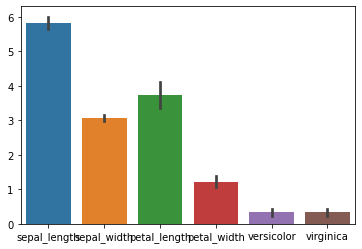

In [127]:
num_vars=['sepal_length','sepal_width','petal_length','petal_width','species','versicolor','virginica']
cat_vars=['species']
for col in cat_vars:
    print(col)
    print(iris_train[col].value_counts())
    print(iris_train[col].value_counts(normalize=True)*100)
    sns.barplot(data=iris_train)
    plt.show()

In [104]:
# problem 1-3

sepal_length
6.7    6
6.1    6
5.0    6
5.1    6
5.4    5
5.7    5
4.9    4
5.5    4
5.8    4
6.2    4
4.8    3
5.6    3
7.2    3
6.8    3
6.4    3
6.0    3
6.3    3
6.9    3
7.7    2
5.9    2
4.6    2
4.4    2
6.5    2
5.2    2
6.6    1
4.5    1
7.9    1
4.3    1
Name: sepal_length, dtype: int64
6.7    6.666667
6.1    6.666667
5.0    6.666667
5.1    6.666667
5.4    5.555556
5.7    5.555556
4.9    4.444444
5.5    4.444444
5.8    4.444444
6.2    4.444444
4.8    3.333333
5.6    3.333333
7.2    3.333333
6.8    3.333333
6.4    3.333333
6.0    3.333333
6.3    3.333333
6.9    3.333333
7.7    2.222222
5.9    2.222222
4.6    2.222222
4.4    2.222222
6.5    2.222222
5.2    2.222222
6.6    1.111111
4.5    1.111111
7.9    1.111111
4.3    1.111111
Name: sepal_length, dtype: float64


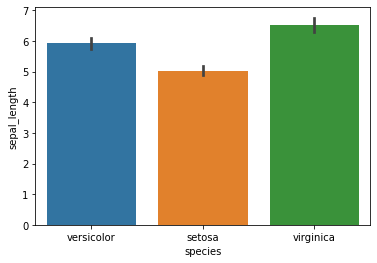

sepal_width
3.0    14
2.9     9
2.8     8
3.2     8
3.4     6
3.1     6
2.7     5
2.5     4
3.3     4
3.8     4
2.3     3
3.5     3
3.6     3
3.7     2
3.9     2
2.4     2
2.2     2
2.6     1
4.2     1
4.0     1
2.0     1
4.4     1
Name: sepal_width, dtype: int64
3.0    15.555556
2.9    10.000000
2.8     8.888889
3.2     8.888889
3.4     6.666667
3.1     6.666667
2.7     5.555556
2.5     4.444444
3.3     4.444444
3.8     4.444444
2.3     3.333333
3.5     3.333333
3.6     3.333333
3.7     2.222222
3.9     2.222222
2.4     2.222222
2.2     2.222222
2.6     1.111111
4.2     1.111111
4.0     1.111111
2.0     1.111111
4.4     1.111111
Name: sepal_width, dtype: float64


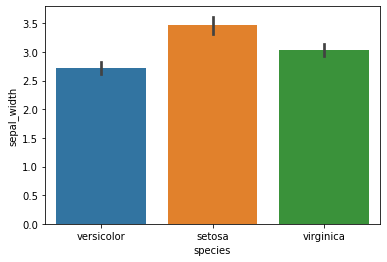

petal_length
1.5    7
1.4    7
5.1    5
4.5    5
4.0    4
1.3    4
1.6    4
4.7    3
5.7    3
5.6    3
4.8    3
1.7    3
4.9    3
4.3    2
5.0    2
5.8    2
4.1    2
6.0    2
6.1    2
1.2    2
5.4    2
5.3    2
4.6    2
5.2    1
4.2    1
3.6    1
4.4    1
3.9    1
1.1    1
3.7    1
6.4    1
6.7    1
1.0    1
5.9    1
3.3    1
5.5    1
1.9    1
3.5    1
3.0    1
Name: petal_length, dtype: int64
1.5    7.777778
1.4    7.777778
5.1    5.555556
4.5    5.555556
4.0    4.444444
1.3    4.444444
1.6    4.444444
4.7    3.333333
5.7    3.333333
5.6    3.333333
4.8    3.333333
1.7    3.333333
4.9    3.333333
4.3    2.222222
5.0    2.222222
5.8    2.222222
4.1    2.222222
6.0    2.222222
6.1    2.222222
1.2    2.222222
5.4    2.222222
5.3    2.222222
4.6    2.222222
5.2    1.111111
4.2    1.111111
3.6    1.111111
4.4    1.111111
3.9    1.111111
1.1    1.111111
3.7    1.111111
6.4    1.111111
6.7    1.111111
1.0    1.111111
5.9    1.111111
3.3    1.111111
5.5    1.111111
1.9    1.111111
3.5    1.11

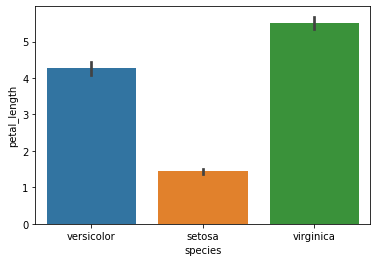

petal_width
0.2    14
1.3    11
0.4     7
2.3     6
1.8     6
1.0     5
1.4     5
2.0     5
1.5     5
0.3     4
0.1     3
2.5     3
2.1     3
1.6     2
2.4     2
1.9     2
1.7     2
1.2     1
0.5     1
2.2     1
0.6     1
1.1     1
Name: petal_width, dtype: int64
0.2    15.555556
1.3    12.222222
0.4     7.777778
2.3     6.666667
1.8     6.666667
1.0     5.555556
1.4     5.555556
2.0     5.555556
1.5     5.555556
0.3     4.444444
0.1     3.333333
2.5     3.333333
2.1     3.333333
1.6     2.222222
2.4     2.222222
1.9     2.222222
1.7     2.222222
1.2     1.111111
0.5     1.111111
2.2     1.111111
0.6     1.111111
1.1     1.111111
Name: petal_width, dtype: float64


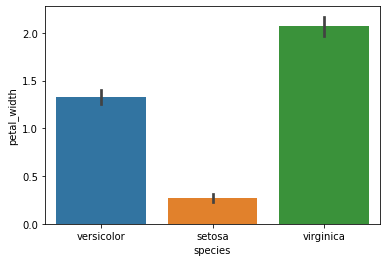

versicolor
0    60
1    30
Name: versicolor, dtype: int64
0    66.666667
1    33.333333
Name: versicolor, dtype: float64


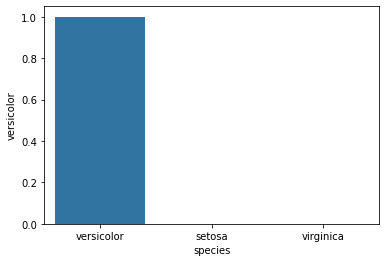

virginica
0    60
1    30
Name: virginica, dtype: int64
0    66.666667
1    33.333333
Name: virginica, dtype: float64


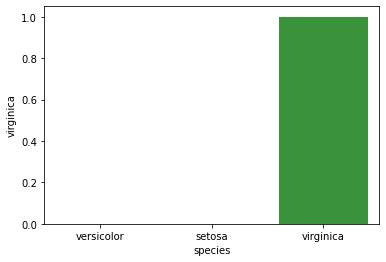

In [129]:
num_vars=['sepal_length','sepal_width','petal_length','petal_width','versicolor','virginica']
cat_vars=['species']
for col in num_vars:
    print(col)
    print(iris_train[col].value_counts())
    print(iris_train[col].value_counts(normalize=True)*100)
    sns.barplot(x='species', y=(col),data=iris_train)
    plt.show()

In [80]:
iris_train[iris_train.species=='versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,30.000000,30.000000,30.000000,30.000000,30.0,30.0
mean,5.920000,2.726667,4.276667,1.326667,1.0,0.0
std,0.534596,0.310654,0.511713,0.204995,0.0,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0,0.0
25%,5.525000,2.500000,4.000000,1.300000,1.0,0.0
50%,6.000000,2.800000,4.350000,1.300000,1.0,0.0
75%,6.200000,2.900000,4.675000,1.475000,1.0,0.0
max,6.900000,3.200000,5.100000,1.800000,1.0,0.0


In [95]:
iris_train[iris_train.species=='virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,30.000000,30.000000,30.000000,30.000000,30.0,30.0
mean,6.526667,3.033333,5.510000,2.070000,0.0,1.0
std,0.666919,0.300956,0.499897,0.285452,0.0,0.0
min,4.900000,2.500000,4.500000,1.400000,0.0,1.0
25%,6.125000,2.800000,5.100000,1.825000,0.0,1.0
50%,6.500000,3.000000,5.550000,2.050000,0.0,1.0
75%,6.875000,3.200000,5.800000,2.300000,0.0,1.0
max,7.900000,3.800000,6.700000,2.500000,0.0,1.0


In [96]:
iris_train[iris_train.species=='setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,30.000000,30.000000,30.000000,30.000000,30.0,30.0
mean,5.033333,3.466667,1.446667,0.273333,0.0,0.0
std,0.393335,0.429381,0.190703,0.122990,0.0,0.0
min,4.300000,2.300000,1.000000,0.100000,0.0,0.0
25%,4.800000,3.200000,1.325000,0.200000,0.0,0.0
50%,5.000000,3.450000,1.450000,0.200000,0.0,0.0
75%,5.350000,3.775000,1.575000,0.400000,0.0,0.0
max,5.800000,4.400000,1.900000,0.600000,0.0,0.0


In [99]:
from scipy.stats import mannwhitneyu
setosa=iris_train[iris_train.species=='setosa'].mean()
virginica=iris_train[iris_train.species=='virginica'].mean()
versicolor=iris_train[iris_train.species=='versicolor'].mean()
mannwhitneyu(virginica,versicolor)

MannwhitneyuResult(statistic=20.0, pvalue=0.8095268319140044)

In [100]:
mannwhitneyu(virginica,setosa)

MannwhitneyuResult(statistic=22.0, pvalue=0.5724755739211049)

In [101]:
mannwhitneyu(versicolor,setosa)

MannwhitneyuResult(statistic=22.0, pvalue=0.5724755739211049)

In [103]:
# problem1-4

sepal_length
6.7    6
6.1    6
5.0    6
5.1    6
5.4    5
5.7    5
4.9    4
5.5    4
5.8    4
6.2    4
4.8    3
5.6    3
7.2    3
6.8    3
6.4    3
6.0    3
6.3    3
6.9    3
7.7    2
5.9    2
4.6    2
4.4    2
6.5    2
5.2    2
6.6    1
4.5    1
7.9    1
4.3    1
Name: sepal_length, dtype: int64
6.7    6.666667
6.1    6.666667
5.0    6.666667
5.1    6.666667
5.4    5.555556
5.7    5.555556
4.9    4.444444
5.5    4.444444
5.8    4.444444
6.2    4.444444
4.8    3.333333
5.6    3.333333
7.2    3.333333
6.8    3.333333
6.4    3.333333
6.0    3.333333
6.3    3.333333
6.9    3.333333
7.7    2.222222
5.9    2.222222
4.6    2.222222
4.4    2.222222
6.5    2.222222
5.2    2.222222
6.6    1.111111
4.5    1.111111
7.9    1.111111
4.3    1.111111
Name: sepal_length, dtype: float64


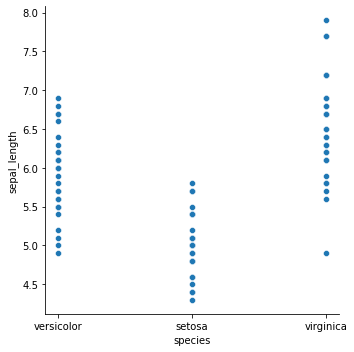

sepal_width
3.0    14
2.9     9
2.8     8
3.2     8
3.4     6
3.1     6
2.7     5
2.5     4
3.3     4
3.8     4
2.3     3
3.5     3
3.6     3
3.7     2
3.9     2
2.4     2
2.2     2
2.6     1
4.2     1
4.0     1
2.0     1
4.4     1
Name: sepal_width, dtype: int64
3.0    15.555556
2.9    10.000000
2.8     8.888889
3.2     8.888889
3.4     6.666667
3.1     6.666667
2.7     5.555556
2.5     4.444444
3.3     4.444444
3.8     4.444444
2.3     3.333333
3.5     3.333333
3.6     3.333333
3.7     2.222222
3.9     2.222222
2.4     2.222222
2.2     2.222222
2.6     1.111111
4.2     1.111111
4.0     1.111111
2.0     1.111111
4.4     1.111111
Name: sepal_width, dtype: float64


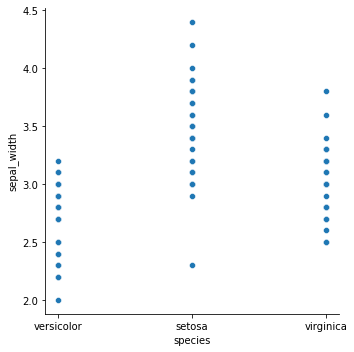

petal_length
1.5    7
1.4    7
5.1    5
4.5    5
4.0    4
1.3    4
1.6    4
4.7    3
5.7    3
5.6    3
4.8    3
1.7    3
4.9    3
4.3    2
5.0    2
5.8    2
4.1    2
6.0    2
6.1    2
1.2    2
5.4    2
5.3    2
4.6    2
5.2    1
4.2    1
3.6    1
4.4    1
3.9    1
1.1    1
3.7    1
6.4    1
6.7    1
1.0    1
5.9    1
3.3    1
5.5    1
1.9    1
3.5    1
3.0    1
Name: petal_length, dtype: int64
1.5    7.777778
1.4    7.777778
5.1    5.555556
4.5    5.555556
4.0    4.444444
1.3    4.444444
1.6    4.444444
4.7    3.333333
5.7    3.333333
5.6    3.333333
4.8    3.333333
1.7    3.333333
4.9    3.333333
4.3    2.222222
5.0    2.222222
5.8    2.222222
4.1    2.222222
6.0    2.222222
6.1    2.222222
1.2    2.222222
5.4    2.222222
5.3    2.222222
4.6    2.222222
5.2    1.111111
4.2    1.111111
3.6    1.111111
4.4    1.111111
3.9    1.111111
1.1    1.111111
3.7    1.111111
6.4    1.111111
6.7    1.111111
1.0    1.111111
5.9    1.111111
3.3    1.111111
5.5    1.111111
1.9    1.111111
3.5    1.11

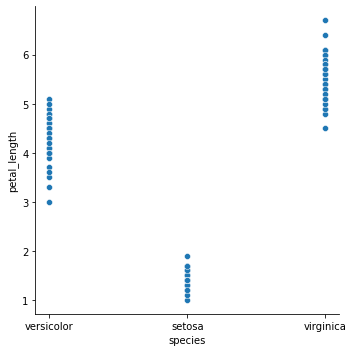

petal_width
0.2    14
1.3    11
0.4     7
2.3     6
1.8     6
1.0     5
1.4     5
2.0     5
1.5     5
0.3     4
0.1     3
2.5     3
2.1     3
1.6     2
2.4     2
1.9     2
1.7     2
1.2     1
0.5     1
2.2     1
0.6     1
1.1     1
Name: petal_width, dtype: int64
0.2    15.555556
1.3    12.222222
0.4     7.777778
2.3     6.666667
1.8     6.666667
1.0     5.555556
1.4     5.555556
2.0     5.555556
1.5     5.555556
0.3     4.444444
0.1     3.333333
2.5     3.333333
2.1     3.333333
1.6     2.222222
2.4     2.222222
1.9     2.222222
1.7     2.222222
1.2     1.111111
0.5     1.111111
2.2     1.111111
0.6     1.111111
1.1     1.111111
Name: petal_width, dtype: float64


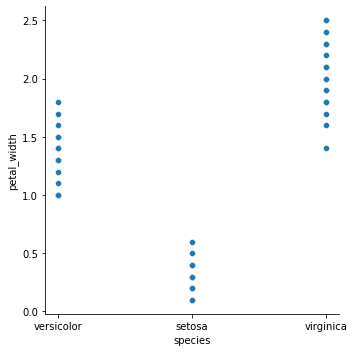

versicolor
0    60
1    30
Name: versicolor, dtype: int64
0    66.666667
1    33.333333
Name: versicolor, dtype: float64


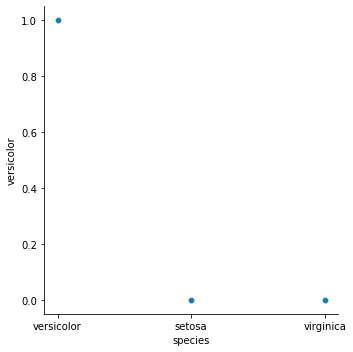

virginica
0    60
1    30
Name: virginica, dtype: int64
0    66.666667
1    33.333333
Name: virginica, dtype: float64


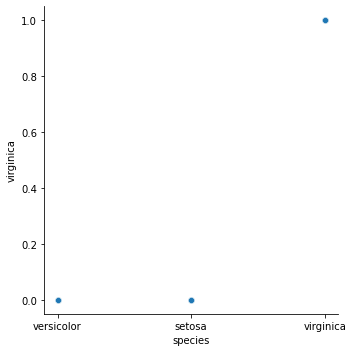

In [125]:
num_vars=['sepal_length','sepal_width','petal_length','petal_width','versicolor','virginica']
cat_vars=['species']
for col in num_vars:
    print(col)
    print(iris_train[col].value_counts())
    print(iris_train[col].value_counts(normalize=True)*100)
    sns.relplot(x='species', y=col, data=iris_train)
    plt.show()

sepal_length
6.7    6
6.1    6
5.0    6
5.1    6
5.4    5
5.7    5
4.9    4
5.5    4
5.8    4
6.2    4
4.8    3
5.6    3
7.2    3
6.8    3
6.4    3
6.0    3
6.3    3
6.9    3
7.7    2
5.9    2
4.6    2
4.4    2
6.5    2
5.2    2
6.6    1
4.5    1
7.9    1
4.3    1
Name: sepal_length, dtype: int64
6.7    6.666667
6.1    6.666667
5.0    6.666667
5.1    6.666667
5.4    5.555556
5.7    5.555556
4.9    4.444444
5.5    4.444444
5.8    4.444444
6.2    4.444444
4.8    3.333333
5.6    3.333333
7.2    3.333333
6.8    3.333333
6.4    3.333333
6.0    3.333333
6.3    3.333333
6.9    3.333333
7.7    2.222222
5.9    2.222222
4.6    2.222222
4.4    2.222222
6.5    2.222222
5.2    2.222222
6.6    1.111111
4.5    1.111111
7.9    1.111111
4.3    1.111111
Name: sepal_length, dtype: float64


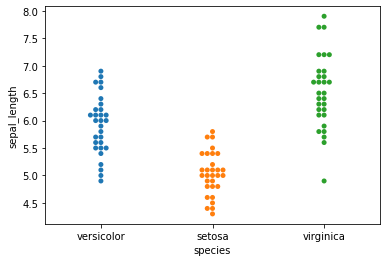

sepal_width
3.0    14
2.9     9
2.8     8
3.2     8
3.4     6
3.1     6
2.7     5
2.5     4
3.3     4
3.8     4
2.3     3
3.5     3
3.6     3
3.7     2
3.9     2
2.4     2
2.2     2
2.6     1
4.2     1
4.0     1
2.0     1
4.4     1
Name: sepal_width, dtype: int64
3.0    15.555556
2.9    10.000000
2.8     8.888889
3.2     8.888889
3.4     6.666667
3.1     6.666667
2.7     5.555556
2.5     4.444444
3.3     4.444444
3.8     4.444444
2.3     3.333333
3.5     3.333333
3.6     3.333333
3.7     2.222222
3.9     2.222222
2.4     2.222222
2.2     2.222222
2.6     1.111111
4.2     1.111111
4.0     1.111111
2.0     1.111111
4.4     1.111111
Name: sepal_width, dtype: float64


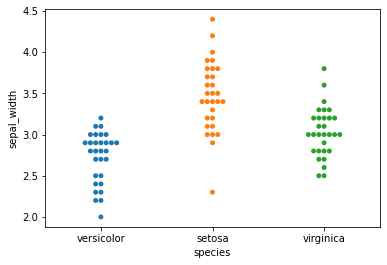

petal_length
1.5    7
1.4    7
5.1    5
4.5    5
4.0    4
1.3    4
1.6    4
4.7    3
5.7    3
5.6    3
4.8    3
1.7    3
4.9    3
4.3    2
5.0    2
5.8    2
4.1    2
6.0    2
6.1    2
1.2    2
5.4    2
5.3    2
4.6    2
5.2    1
4.2    1
3.6    1
4.4    1
3.9    1
1.1    1
3.7    1
6.4    1
6.7    1
1.0    1
5.9    1
3.3    1
5.5    1
1.9    1
3.5    1
3.0    1
Name: petal_length, dtype: int64
1.5    7.777778
1.4    7.777778
5.1    5.555556
4.5    5.555556
4.0    4.444444
1.3    4.444444
1.6    4.444444
4.7    3.333333
5.7    3.333333
5.6    3.333333
4.8    3.333333
1.7    3.333333
4.9    3.333333
4.3    2.222222
5.0    2.222222
5.8    2.222222
4.1    2.222222
6.0    2.222222
6.1    2.222222
1.2    2.222222
5.4    2.222222
5.3    2.222222
4.6    2.222222
5.2    1.111111
4.2    1.111111
3.6    1.111111
4.4    1.111111
3.9    1.111111
1.1    1.111111
3.7    1.111111
6.4    1.111111
6.7    1.111111
1.0    1.111111
5.9    1.111111
3.3    1.111111
5.5    1.111111
1.9    1.111111
3.5    1.11

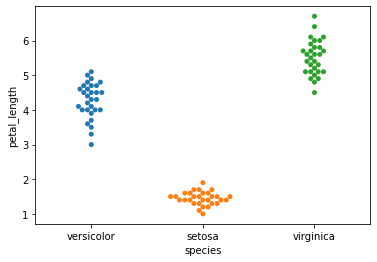

petal_width
0.2    14
1.3    11
0.4     7
2.3     6
1.8     6
1.0     5
1.4     5
2.0     5
1.5     5
0.3     4
0.1     3
2.5     3
2.1     3
1.6     2
2.4     2
1.9     2
1.7     2
1.2     1
0.5     1
2.2     1
0.6     1
1.1     1
Name: petal_width, dtype: int64
0.2    15.555556
1.3    12.222222
0.4     7.777778
2.3     6.666667
1.8     6.666667
1.0     5.555556
1.4     5.555556
2.0     5.555556
1.5     5.555556
0.3     4.444444
0.1     3.333333
2.5     3.333333
2.1     3.333333
1.6     2.222222
2.4     2.222222
1.9     2.222222
1.7     2.222222
1.2     1.111111
0.5     1.111111
2.2     1.111111
0.6     1.111111
1.1     1.111111
Name: petal_width, dtype: float64


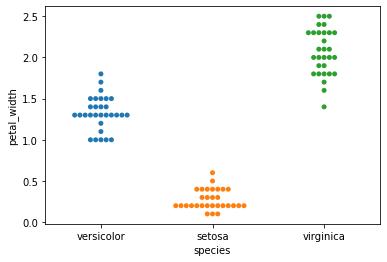

versicolor
0    60
1    30
Name: versicolor, dtype: int64
0    66.666667
1    33.333333
Name: versicolor, dtype: float64


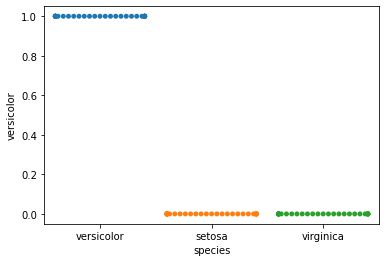

virginica
0    60
1    30
Name: virginica, dtype: int64
0    66.666667
1    33.333333
Name: virginica, dtype: float64


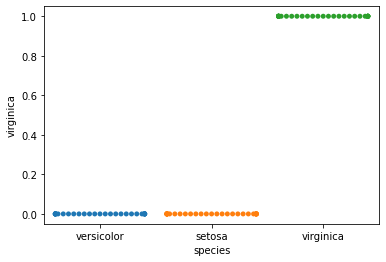

In [124]:
num_vars=['sepal_length','sepal_width','petal_length','petal_width','versicolor','virginica']
cat_vars=['species']
for col in num_vars:
    print(col)
    print(iris_train[col].value_counts())
    print(iris_train[col].value_counts(normalize=True)*100)
    sns.swarmplot(x='species',y=col,data=iris_train)
    plt.show()

In [130]:
# we can use petal_width to determine the species
# H0=every species petal_width are no different
# H1=we can use petal width to determine what species they are

In [131]:
versicolor_w = iris_train[iris_train.species == 'versicolor'].sepal_width
virginica_w = iris_train[iris_train.species == 'virginica'].sepal_width
setosa_w = iris_train[iris_train.species == 'setosa'].sepal_width

<AxesSubplot:>

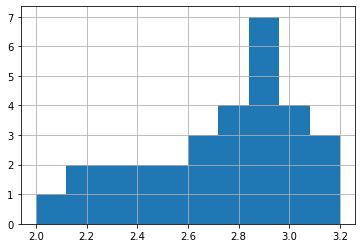

In [132]:
versicolor_w.hist()

<AxesSubplot:>

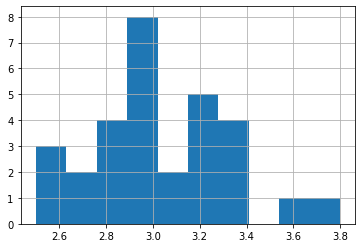

In [133]:
virginica_w.hist()

<AxesSubplot:>

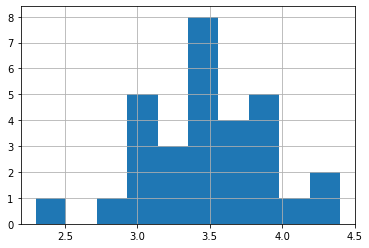

In [134]:
setosa_w.hist()

In [136]:
versicolor_w.var(),virginica_w.var(),setosa_w.var()

(0.09650574712643681, 0.09057471264367817, 0.184367816091954)

In [137]:
f, p = stats.f_oneway(versicolor_w, virginica_w, setosa_w)
f, p

(33.494120559475185, 1.634476563340487e-11)

In [139]:
if p < 0.05:
    print("we can use petal width to determine what species they are")
else:
    print("every species petal_width are no different")

we can use petal width to determine what species they are


In [7]:
# problem2-1

In [8]:
ac_df_titanic=acquire.get_titanic_data()

In [9]:
pr_titanic=prepare.prep_iris(ac_df_titanic)

In [10]:
target='survied'

In [15]:
ti_train, ti_validate, ti_test = prepare.split_titanic(pr_titanic,target)

In [20]:
ti_train

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,0,0,7.8958,1,1,0,0
380,1,1,0,0,227.5250,1,0,0,0
492,0,1,0,0,30.5000,1,1,0,1
55,1,1,0,0,35.5000,1,1,0,1
243,0,3,0,0,7.1250,1,1,0,1
...,...,...,...,...,...,...,...,...,...
695,0,2,0,0,13.5000,1,1,0,1
128,1,3,1,1,22.3583,0,0,0,0
636,0,3,0,0,7.9250,1,1,0,1
222,0,3,0,0,8.0500,1,1,0,1


In [19]:
ti_train.drop(columns=['passenger_id','sex','embark_town'],inplace=True)

KeyError: "['passenger_id', 'sex', 'embark_town'] not found in axis"

In [ ]:
# problem2-2

In [27]:
ti_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 455 to 496
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 534 non-null    int64  
 1   pclass                   534 non-null    int64  
 2   sibsp                    534 non-null    int64  
 3   parch                    534 non-null    int64  
 4   fare                     534 non-null    float64
 5   alone                    534 non-null    int64  
 6   sex_male                 534 non-null    uint8  
 7   embark_town_Queenstown   534 non-null    uint8  
 8   embark_town_Southampton  534 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 30.8 KB


In [29]:
ti_train.describe(include='all')

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,0.383895,2.323970,0.514981,0.352060,31.058106,0.627341,0.651685,0.086142,0.711610
std,0.486789,0.822928,1.143856,0.759941,46.866121,0.483966,0.476883,0.280837,0.453438
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,13.500000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,30.053100,1.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,8.000000,5.000000,512.329200,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'pclass'}>,
        <AxesSubplot:title={'center':'sibsp'}>],
       [<AxesSubplot:title={'center':'parch'}>,
        <AxesSubplot:title={'center':'fare'}>,
        <AxesSubplot:title={'center':'alone'}>],
       [<AxesSubplot:title={'center':'sex_male'}>,
        <AxesSubplot:title={'center':'embark_town_Queenstown'}>,
        <AxesSubplot:title={'center':'embark_town_Southampton'}>]],
      dtype=object)

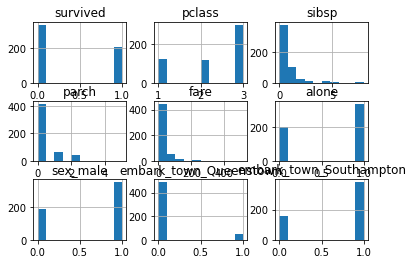

In [31]:
ti_train.hist()

pclass
3    295
1    122
2    117
Name: pclass, dtype: int64
3    55.243446
1    22.846442
2    21.910112
Name: pclass, dtype: float64


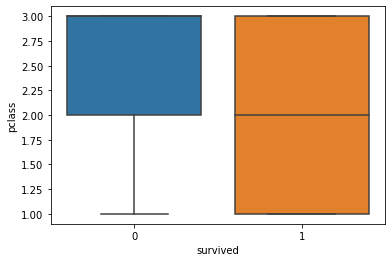

sibsp
0    378
1    106
2     22
3     10
4     10
8      5
5      3
Name: sibsp, dtype: int64
0    70.786517
1    19.850187
2     4.119850
3     1.872659
4     1.872659
8     0.936330
5     0.561798
Name: sibsp, dtype: float64


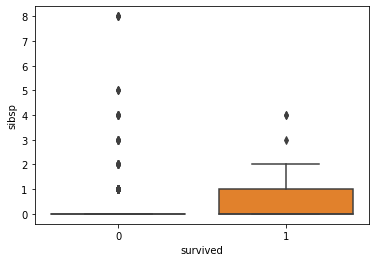

parch
0    414
1     67
2     45
3      4
5      3
4      1
Name: parch, dtype: int64
0    77.528090
1    12.546816
2     8.426966
3     0.749064
5     0.561798
4     0.187266
Name: parch, dtype: float64


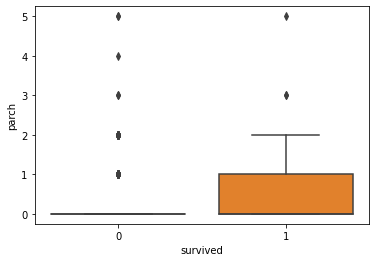

fare
13.0000    27
7.8958     26
8.0500     25
7.7500     21
26.0000    17
           ..
8.6833      1
25.9250     1
14.4000     1
7.8875      1
78.2667     1
Name: fare, Length: 197, dtype: int64
13.0000    5.056180
7.8958     4.868914
8.0500     4.681648
7.7500     3.932584
26.0000    3.183521
             ...   
8.6833     0.187266
25.9250    0.187266
14.4000    0.187266
7.8875     0.187266
78.2667    0.187266
Name: fare, Length: 197, dtype: float64


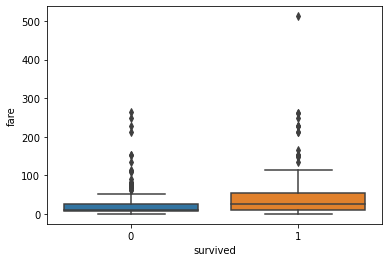

alone
1    335
0    199
Name: alone, dtype: int64
1    62.734082
0    37.265918
Name: alone, dtype: float64


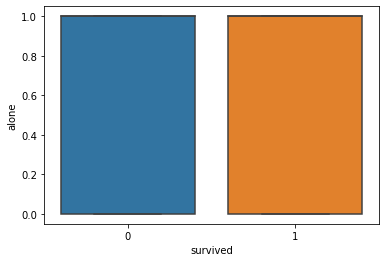

sex_male
1    348
0    186
Name: sex_male, dtype: int64
1    65.168539
0    34.831461
Name: sex_male, dtype: float64


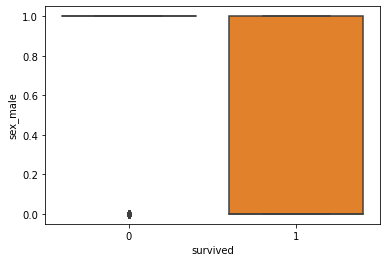

embark_town_Queenstown
0    488
1     46
Name: embark_town_Queenstown, dtype: int64
0    91.385768
1     8.614232
Name: embark_town_Queenstown, dtype: float64


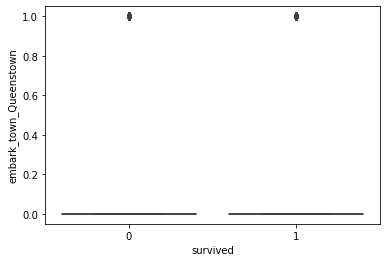

embark_town_Southampton
1    380
0    154
Name: embark_town_Southampton, dtype: int64
1    71.161049
0    28.838951
Name: embark_town_Southampton, dtype: float64


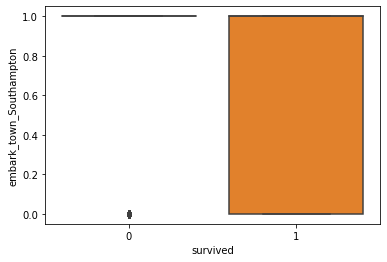

In [38]:
num_vars=['pclass','sibsp','parch','fare','alone','sex_male','embark_town_Queenstown','embark_town_Southampton']
tar_vars=['survived']
for col in num_vars:
    print(col)
    print(ti_train[col].value_counts())
    print(ti_train[col].value_counts(normalize=True)*100)
    sns.boxplot(x='survived',y=col, data=ti_train)
    plt.show()

In [39]:
# problem2-3

pclass
3    295
1    122
2    117
Name: pclass, dtype: int64
3    55.243446
1    22.846442
2    21.910112
Name: pclass, dtype: float64


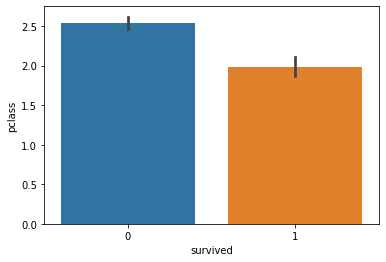

sibsp
0    378
1    106
2     22
3     10
4     10
8      5
5      3
Name: sibsp, dtype: int64
0    70.786517
1    19.850187
2     4.119850
3     1.872659
4     1.872659
8     0.936330
5     0.561798
Name: sibsp, dtype: float64


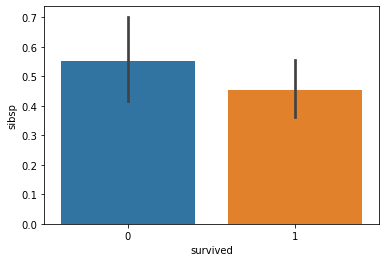

parch
0    414
1     67
2     45
3      4
5      3
4      1
Name: parch, dtype: int64
0    77.528090
1    12.546816
2     8.426966
3     0.749064
5     0.561798
4     0.187266
Name: parch, dtype: float64


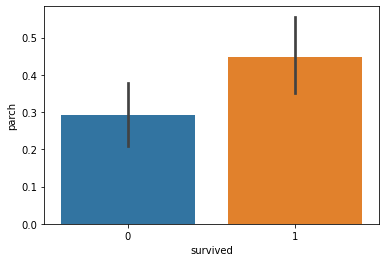

fare
13.0000    27
7.8958     26
8.0500     25
7.7500     21
26.0000    17
           ..
8.6833      1
25.9250     1
14.4000     1
7.8875      1
78.2667     1
Name: fare, Length: 197, dtype: int64
13.0000    5.056180
7.8958     4.868914
8.0500     4.681648
7.7500     3.932584
26.0000    3.183521
             ...   
8.6833     0.187266
25.9250    0.187266
14.4000    0.187266
7.8875     0.187266
78.2667    0.187266
Name: fare, Length: 197, dtype: float64


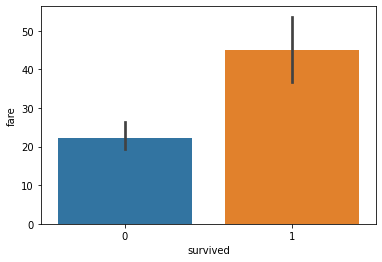

alone
1    335
0    199
Name: alone, dtype: int64
1    62.734082
0    37.265918
Name: alone, dtype: float64


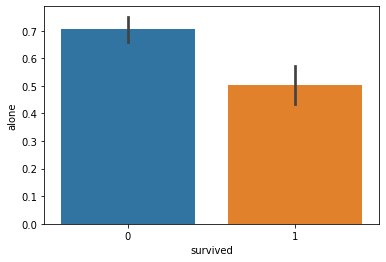

sex_male
1    348
0    186
Name: sex_male, dtype: int64
1    65.168539
0    34.831461
Name: sex_male, dtype: float64


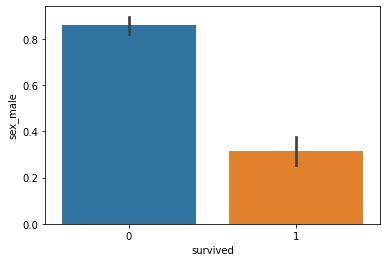

embark_town_Queenstown
0    488
1     46
Name: embark_town_Queenstown, dtype: int64
0    91.385768
1     8.614232
Name: embark_town_Queenstown, dtype: float64


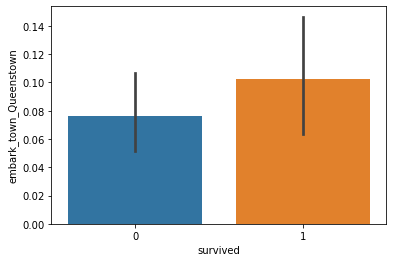

embark_town_Southampton
1    380
0    154
Name: embark_town_Southampton, dtype: int64
1    71.161049
0    28.838951
Name: embark_town_Southampton, dtype: float64


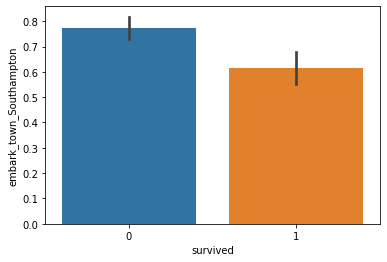

In [40]:
num_vars=['pclass','sibsp','parch','fare','alone','sex_male','embark_town_Queenstown','embark_town_Southampton']
tar_vars=['survived']
for col in num_vars:
    print(col)
    print(ti_train[col].value_counts())
    print(ti_train[col].value_counts(normalize=True)*100)
    sns.barplot(x='survived',y=col, data=ti_train)
    plt.show()

In [41]:
ti_train[ti_train.survived==0].describe()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
count,329.0,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,0.0,2.537994,0.553191,0.291793,22.338397,0.705167,0.860182,0.075988,0.772036
std,0.0,0.727875,1.344953,0.740772,32.917040,0.456662,0.347326,0.265382,0.420158
min,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,2.000000,0.000000,0.000000,7.854200,0.000000,1.000000,0.000000,1.000000
50%,0.0,3.000000,0.000000,0.000000,9.500000,1.000000,1.000000,0.000000,1.000000
75%,0.0,3.000000,0.000000,0.000000,26.000000,1.000000,1.000000,0.000000,1.000000
max,0.0,3.000000,8.000000,5.000000,263.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
ti_train[ti_train.survived==1].describe()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
count,205.0,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,1.0,1.980488,0.453659,0.448780,45.052176,0.502439,0.317073,0.102439,0.614634
std,0.0,0.851533,0.709908,0.781879,60.639552,0.501218,0.466475,0.303967,0.487873
min,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,0.000000,0.000000,11.241700,0.000000,0.000000,0.000000,0.000000
50%,1.0,2.000000,0.000000,0.000000,26.000000,1.000000,0.000000,0.000000,1.000000
75%,1.0,3.000000,1.000000,1.000000,55.441700,1.000000,1.000000,0.000000,1.000000
max,1.0,3.000000,4.000000,5.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [92]:
from scipy.stats import mannwhitneyu
st,p=mannwhitneyu(ti_train.survived,ti_train)
p<0.05

array([False,  True, False,  True,  True,  True,  True,  True,  True])

TypeError: data type 'mean' not understood